In [10]:
import pandas as pd
import numpy as np 
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.feature_extraction import _dict_vectorizer
import seaborn as sns

In [11]:
df = pd.read_csv("IMDB Dataset.csv")

In [12]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [13]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [16]:
df.isna()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [17]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [18]:
df.dropna()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [19]:
df.shape

(50000, 2)

In [20]:
df.head(3).sum()

review       One of the other reviewers has mentioned that ...
sentiment                             positivepositivepositive
dtype: object

In [21]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [22]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [24]:
# Load IMDB dataset with top 10,000 most frequent words
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training data: ", X_train.shape)
print("Test data: ", X_test.shape)

Training data:  (25000,)
Test data:  (25000,)


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum review length (e.g., 200 words)
max_len = 200

# Pad the sequences so each input is of length max_len
X_train_padded = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_len, padding='post')

print("Padded training data shape: ", X_train_padded.shape)
print("Padded test data shape: ", X_test_padded.shape)


Padded training data shape:  (25000, 200)
Padded test data shape:  (25000, 200)


In [26]:
 
# Prepare embeddings matrix
embedding_dim = 100  # or 300 for larger embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
# Load your GloVe or Word2Vec embeddings into the matrix

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, None, 100)         80400     
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,160,901
Trainable params: 160,901
Non-tr

In [28]:
batch_size = 64
epochs = 5

history = model.fit(X_train_padded, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test_padded, y_test))


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4998WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002212C052660> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
C

In [29]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


782/782 [==============================] - 53s 67ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.00%


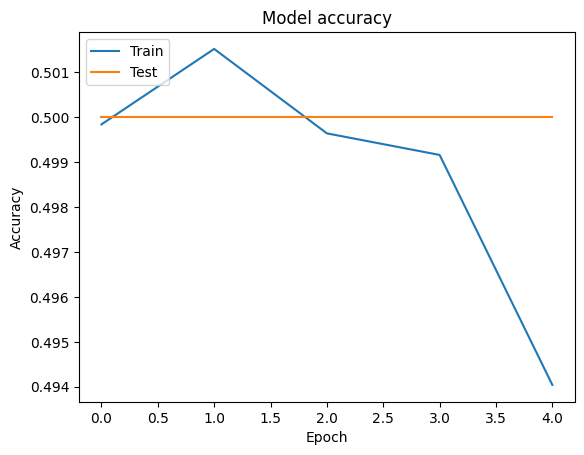

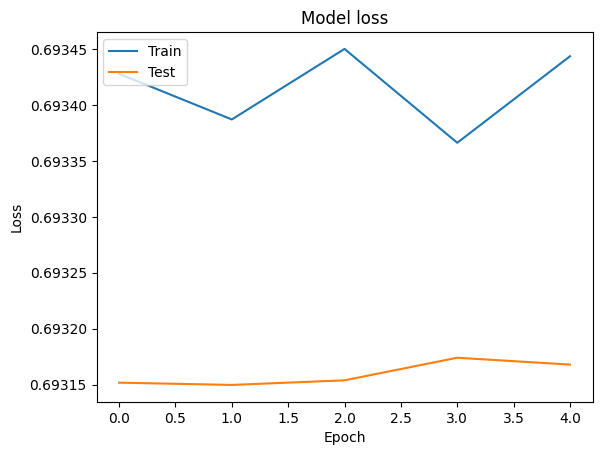

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [31]:
model.save('imdb_sentiment_model.h5')


In [32]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('imdb_sentiment_model.h5')

# Example prediction
new_review = [1, 14, 22, 16, 43, 530, 973, 1622, 1385]  # Example tokenized review
new_review_padded = pad_sequences([new_review], maxlen=max_len, padding='post')
predicted_sentiment = model.predict(new_review_padded)

if predicted_sentiment >= 0.5:
    print("Positive Review")
else:
    print("Negative Review")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 1s/step
Negative Review


In [33]:
# Accuracy IMprovement

# Vocabulary Size
# Define a sample tokenizer and vocabulary setup
vocab_size = 20000
max_length = 100
embedding_dim = 100


model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))

In [34]:
model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))

# embedding_dim = 100  # Set this according to your pre-trained embeddings


In [35]:
# Define the embedding dimension
embedding_dim = 100  # or 200, depending on your pre-trained embeddings
pretrained_embedding = 100
max_length = 50
embedding_layer = Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            weights=[pretrained_embedding], 
                            input_length=max_length, 
                            trainable=False)


In [36]:
# Assuming you have already created your vocab_size and pretrained_embedding
vocab_size = 20000  # example vocab size
pretrained_embedding = ...  # Load your pre-trained embeddings here

# Define the embedding dimension
embedding_dim = 100  # Set this according to your pre-trained embeddings

# Create the embedding layer
embedding_layer = Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            weights=[pretrained_embedding], 
                            input_length=max_length, 
                            trainable=False)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


In [38]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

In [39]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = df['review']  # Features
y = df['sentiment']  # Target (replace with actual target column name)

# Split data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data into numerical features using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Display the shape of transformed data
print(X_train_tfidf.shape, X_val_tfidf.shape)


(40000, 5000) (10000, 5000)


# Naive Bias Accuracy is Good

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Build and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on validation set
y_pred_nb = nb_model.predict(X_val_tfidf)

# Evaluate the model
nb_accuracy = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(classification_report(y_val, y_pred_nb))


Naive Bayes Accuracy: 0.8555
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Logistic Regression 


In [42]:
from sklearn.linear_model import LogisticRegression

# Build and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on validation set
y_pred_lr = lr_model.predict(X_val_tfidf)

# Evaluate the model
lr_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(classification_report(y_val, y_pred_lr))


Logistic Regression Accuracy: 0.8929
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# SVM  

In [43]:
# Select a smaller subset for quicker testing
df_subset = df.sample(frac=0.2, random_state=42)  # Use 20% of the data


In [44]:
# Reduce the number of features for quicker vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
tfidf = TfidfVectorizer(max_features=2000)


In [45]:
# Example for Logistic Regression
lr_model = LogisticRegression(max_iter=100)  # Reduce the max_iter for quicker results

In [47]:
# rf_model = RandomForestClassifier(n_jobs=-1)  # Utilize all available cores for faster training


In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
# Reduce the dataset size for quicker testing
df_small = df.sample(frac=0.2, random_state=42)

# Preprocess the smaller dataset
X_small = df_small['review']
y_small = df_small['sentiment']

# Use a smaller TF-IDF matrix
tfidf_small = TfidfVectorizer(max_features=2000)
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

X_train_tfidf_small = tfidf_small.fit_transform(X_train_small)
X_val_tfidf_small = tfidf_small.transform(X_val_small)

# Train a fast model (Naive Bayes)
nb_model_small = MultinomialNB()
nb_model_small.fit(X_train_tfidf_small, y_train_small)

# Evaluate the model
y_pred_small = nb_model_small.predict(X_val_tfidf_small)
small_accuracy = accuracy_score(y_val_small, y_pred_small)
print(f"Naive Bayes Accuracy (small set): {(small_accuracy)}")

Naive Bayes Accuracy (small set): 0.846


# Gradient Boosting Model

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
# Build and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf_small, y_train_small)

# Predict on validation set
y_pred_gb = gb_model.predict(X_val_tfidf_small)

# Evaluate the model
gb_accuracy = accuracy_score(y_val_small, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(classification_report(y_val_small, y_pred_gb))


Gradient Boosting Accuracy: 0.8035
              precision    recall  f1-score   support

    negative       0.85      0.74      0.79       999
    positive       0.77      0.87      0.82      1001

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000



# Model Comparison and Hyperparameter Tuning

In [51]:
print(f"Naive Bayes Accuracy: {small_accuracy}")
# print(f"Logistic Regression Accuracy: {lr_accuracy}")
# print(f"SVM Accuracy: {svm_accuracy}")
# print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")


Naive Bayes Accuracy: 0.846
Gradient Boosting Accuracy: 0.8035


# Aspect Based Sentiment Analysis 

In [52]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

df['cleaned_text'] = df['review'].apply(clean_text)


In [53]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(word_tokenize)


In [54]:
from transformers import pipeline

# Load a sentiment analysis model
sentiment_analyzer = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [55]:
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [56]:
aspects = ['acting', 'story', 'cinematography']  # Define your aspects
# Step 8: Visualization
# Prepare data for visualization
sentiment_counts = defaultdict(lambda: defaultdict(int))

In [57]:
def aspect_based_sentiment_analysis(review, aspects, max_length=512):
    sentiments = {}
    for aspect in aspects:
        if aspect in review:
            # Truncate the review if it exceeds the max length
            tokens = review.split()[:max_length]  # Keep only the first max_length words
            truncated_review = ' '.join(tokens)
            result = sentiment_analyzer(truncated_review)
            sentiments[aspect] = result[0]['label']  # Get sentiment label
    return sentiments


In [58]:
# Re-apply the aspect-based sentiment analysis
df['aspect_sentiments'] = df['sentiment'].apply(lambda x: aspect_based_sentiment_analysis(x, aspects))


In [59]:
# Apply the aspect-based sentiment analysis
df['aspect_sentiments'] = df['sentiment'].apply(lambda x: aspect_based_sentiment_analysis(x, aspects))

In [60]:
df['cleaned_text'] = df['review'].apply(clean_text)

# Define Aspects
aspects = ['acting', 'story', 'cinematography']  # Define your aspects

In [61]:
# Aspect-Based Sentiment Analysis with Truncation
def aspect_based_sentiment_analysis(review, aspects, max_length=512):
    sentiments = {}
    for aspect in aspects:
        if aspect in review:
            # Truncate the review if it exceeds the max length
            tokens = review.split()[:max_length]  # Keep only the first max_length words
            truncated_review = ' '.join(tokens)
            result = sentiment_analyzer(truncated_review)
            sentiments[aspect] = result[0]['label']  # Get sentiment label
    return sentiments

In [62]:
# Apply the analysis
df['aspect_sentiments'] = df['sentiment'].apply(lambda x: aspect_based_sentiment_analysis(x, aspects))


In [63]:
# Check if the column is created
print(df.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens aspect_sentiments  
0  [one, of, the, other, reviewers, has, mentione...                {}  
1  [a, wonderful, little, production, the, filmin...                {}  
2  [i, thought, this, was, a, wonderful, way, t

In [64]:
df.columns


Index(['review', 'sentiment', 'cleaned_text', 'tokens', 'aspect_sentiments'], dtype='object')

In [65]:
# Visualization
sentiment_counts = defaultdict(lambda: defaultdict(int))

for sentiment_dict in df['aspect_sentiments']:
    for aspect, sentiment in sentiment_dict.items():
        sentiment_counts[aspect][sentiment] += 1

In [66]:
# Convert to DataFrame for visualization
visualization_data = []
for aspect, sentiments in sentiment_counts.items():
    for sentiment, count in sentiments.items():
        visualization_data.append({'Aspect': aspect, 'Sentiment': sentiment, 'Count': count})

In [67]:
visualization_df = pd.DataFrame(visualization_data)

In [68]:
print(visualization_df.columns)


Index([], dtype='object')


In [69]:
print(df['aspect_sentiments'].head())


0    {}
1    {}
2    {}
3    {}
4    {}
Name: aspect_sentiments, dtype: object


In [70]:
def aspect_based_sentiment_analysis(review, aspects, max_length=512):
    sentiments = {}
    for aspect in aspects:
        if aspect in review:
            # Truncate the review if it exceeds the max length
            tokens = review.split()[:max_length]
            truncated_review = ' '.join(tokens)
            result = sentiment_analyzer(truncated_review)
            print(f'Analyzing aspect: {aspect}, Review: {truncated_review}, Result: {result}')
            sentiments[aspect] = result[0]['label']  # Get sentiment label
    return sentiments

In [71]:
for aspect in aspects:
    count = df['cleaned_text'].str.contains(aspect).sum()
    print(f'Aspect: {aspect}, Count: {count}')


Aspect: acting, Count: 11124
Aspect: story, Count: 17276
Aspect: cinematography, Count: 1848


In [72]:
print(df['cleaned_text'].head())


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: cleaned_text, dtype: object


In [73]:
# Convert to DataFrame for visualization
visualization_data = []
for aspect, sentiments in sentiment_counts.items():
    for sentiment, count in sentiments.items():
        visualization_data.append({'Aspect': aspect, 'Sentiment': sentiment, 'Count': count})

visualization_df = pd.DataFrame(visualization_data)

# Check the resulting DataFrame
print(visualization_df.head())

Empty DataFrame
Columns: []
Index: []


In [74]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Aspect', hue='Sentiment', data=visualization_df)
plt.title('Aspect-Based Sentiment Analysis')
plt.xlabel('Count')
plt.ylabel('Aspect')
plt.legend(title='Sentiment')
plt.show()

ValueError: Could not interpret value `Count` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [90]:
if visualization_df.empty:
    print("No data to visualize.")
else:
    # Proceed with plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Aspect', hue='Sentiment', data=visualization_df)
    plt.title('Aspect-Based Sentiment Analysis')
    plt.xlabel('Count')
    plt.ylabel('Aspect')
    plt.legend(title='Sentiment')
    plt.show()


No data to visualize.


In [1]:
#  this is the new chapter of begining 

In [ ]:
# this is good go

In [ ]:
# from sklearn.svm import SVC

# # Build and train the SVM model
# svm_model = SVC()
# svm_model.fit(X_train_tfidf, y_train)

# # Predict on validation set
# y_pred_svm = svm_model.predict(X_val_tfidf)

# # Evaluate the model
# svm_accuracy = accuracy_score(y_val, y_pred_svm)
# print(f"SVM Accuracy: {svm_accuracy}")
# print(classification_report(y_val, y_pred_svm))


# heavy computational task 